# Prosper Loan Data Exploration

## by Kelly Wemmer

## Investigation Overview

> In the investigation, I'm interested in the correlation between different variables and how they effect the APR of the loan. The main focus is on credit score, debt to income ratio, prosper rating (Alpha), the term of loan, homeownership, and income range.

## Dataset Overview

> This dataset includes 113937 different loans and 81 variables describing credit scores, APR, employment status, among other information. After cleaning and filtering, 77557 remained to perform my analyses.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Read the csv file
loan_data = pd.read_csv('prosper_loan_data.csv')
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan_data.shape

(113937, 81)

### What is the structure of your dataset?

> This dataset includes 113937 different loans and 81 variables describing credit scores, APR, employment status, among other information.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in the correlation between different variables and how they effect the APR of the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think credit score, debt to income ratio, prosper rating (Alpha), the term of loan, homeownership, and income range all have a significant impact on Annual Percentage Rate.

In [4]:
#Filter out unnecessary data
cols = ['BorrowerAPR', 'Term', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'ProsperRating (Alpha)', 'IncomeRange',  
        'DebtToIncomeRatio', 'IsBorrowerHomeowner']
apr_data = loan_data[cols]
apr_data.head()

,BorrowerAPR,Term,CreditScoreRangeLower,CreditScoreRangeUpper,ProsperRating (Alpha),IncomeRange,DebtToIncomeRatio,IsBorrowerHomeowner
0,0.16516,36,640.0,659.0,NaN,"$25,000-49,999",0.17,True
1,0.12016,36,680.0,699.0,A,"$50,000-74,999",0.18,False
2,0.28269,36,480.0,499.0,NaN,Not displayed,0.06,False
3,0.12528,36,800.0,819.0,A,"$25,000-49,999",0.15,True
4,0.24614,36,680.0,699.0,D,"$100,000+",0.26,True


In [5]:
#Checking for missing data
apr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 8 columns):
BorrowerAPR              113912 non-null float64
Term                     113937 non-null int64
CreditScoreRangeLower    113346 non-null float64
CreditScoreRangeUpper    113346 non-null float64
ProsperRating (Alpha)    84853 non-null object
IncomeRange              113937 non-null object
DebtToIncomeRatio        105383 non-null float64
IsBorrowerHomeowner      113937 non-null bool
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
#Drop missing data from Borrower APR
apr_data = apr_data.dropna(subset=['BorrowerAPR', 'ProsperRating (Alpha)', 'DebtToIncomeRatio'])

In [7]:
apr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77557 entries, 1 to 113936
Data columns (total 8 columns):
BorrowerAPR              77557 non-null float64
Term                     77557 non-null int64
CreditScoreRangeLower    77557 non-null float64
CreditScoreRangeUpper    77557 non-null float64
ProsperRating (Alpha)    77557 non-null object
IncomeRange              77557 non-null object
DebtToIncomeRatio        77557 non-null float64
IsBorrowerHomeowner      77557 non-null bool
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 4.8+ MB


In [8]:
#Combined lower and upper credit score to create an average score
apr_data['MeanCreditScore'] = apr_data[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].mean(axis=1)
#Dropped the lower and upper range credit score columns
apr_data = apr_data.drop(['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis=1)
apr_data

,BorrowerAPR,Term,ProsperRating (Alpha),IncomeRange,DebtToIncomeRatio,IsBorrowerHomeowner,MeanCreditScore
1,0.12016,36,A,"$50,000-74,999",0.18,False,689.5
3,0.12528,36,A,"$25,000-49,999",0.15,True,809.5
4,0.24614,36,D,"$100,000+",0.26,True,689.5
5,0.15425,60,B,"$100,000+",0.36,True,749.5
6,0.31032,36,E,"$25,000-49,999",0.27,False,689.5
7,0.23939,36,C,"$25,000-49,999",0.24,False,709.5
8,0.07620,36,AA,"$25,000-49,999",0.25,True,829.5
9,0.07620,36,AA,"$25,000-49,999",0.25,True,829.5
10,0.27462,60,C,"$75,000-99,999",0.12,False,649.5
12,0.17969,36,B,"$25,000-49,999",0.18,False,689.5


In [9]:
apr_data.isnull().sum()

BorrowerAPR              0
Term                     0
ProsperRating (Alpha)    0
IncomeRange              0
DebtToIncomeRatio        0
IsBorrowerHomeowner      0
MeanCreditScore          0
dtype: int64

## Univariate Exploration

> I will to analyze the distribution of the main variable of interest, the borrower APR. Then I will analyze the distributions of the predictor variables.

## Distribution of Borrower APR

>The Borrower APR histogram has a slightly right skewed distribution with the majority borrowers receiving an APR of around 0.22%. 

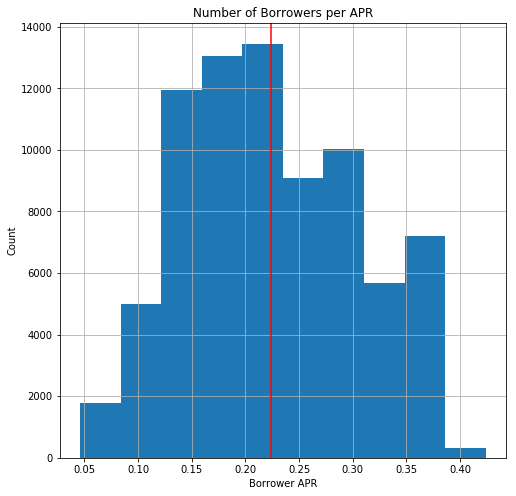

In [10]:
#Viewing the distribution of borrower APR
apr_data['BorrowerAPR'].hist(figsize=(8,8))
plt.axvline(x=apr_data.BorrowerAPR.mean(), color = 'red')
plt.title('Number of Borrowers per APR')
plt.xlabel('Borrower APR')
plt.ylabel('Count');

In [11]:
#Descriptive statistics of numeric variables
apr_data.describe()

,BorrowerAPR,Term,DebtToIncomeRatio,MeanCreditScore
count,77557.00000,77557.000000,77557.000000,77557.000000
mean,0.22373,42.724035,0.258752,708.499446
std,0.07916,11.711915,0.318326,47.160646
min,0.04583,12.000000,0.000000,609.500000
25%,0.16175,36.000000,0.150000,669.500000
50%,0.21566,36.000000,0.220000,709.500000
75%,0.28780,60.000000,0.320000,729.500000
max,0.42395,60.000000,10.010000,889.500000


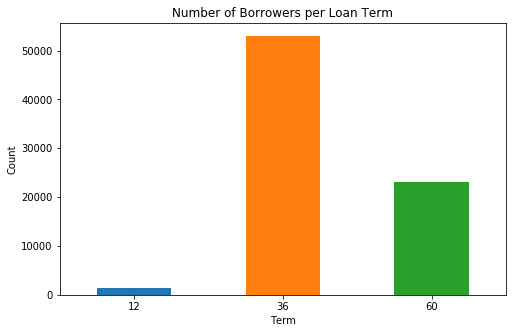

In [12]:
#Viewing the distribution of the term of the loan.
apr_data['Term'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))
plt.xticks(rotation=0)
plt.title('Number of Borrowers per Loan Term')
plt.xlabel('Term')
plt.ylabel('Count');

The 36 month loan has the highest number of borrowers. I would like to investigate any correlation between term of loan and APR rates.

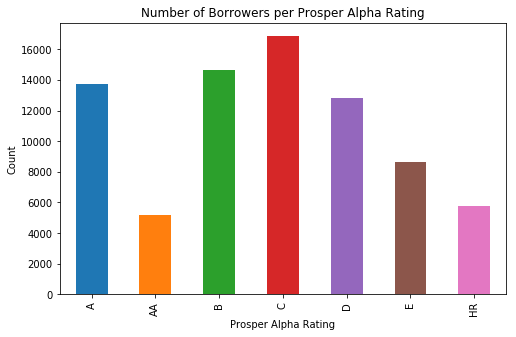

In [13]:
#Viewing the distribution of Prosper ratings.
apr_data['ProsperRating (Alpha)'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))
plt.title('Number of Borrowers per Prosper Alpha Rating')
plt.xlabel('Prosper Alpha Rating')
plt.ylabel('Count');

Most of the borrowers have A, B, and C Prosper Ratings. My next investigation is going to be between Prosper rating and borrower APR rates.

In [14]:
#Viewing the amounts of different income ranges.
income = apr_data['IncomeRange'].value_counts()
income

$50,000-74,999    24030
$25,000-49,999    22023
$100,000+         14019
$75,000-99,999    13644
$1-24,999          3840
Not employed          1
Name: IncomeRange, dtype: int64

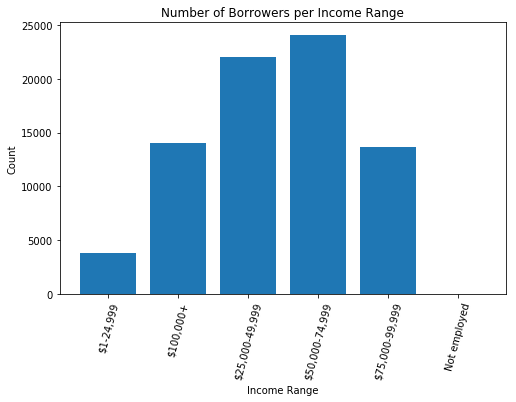

In [15]:
plt.subplots(figsize=(8,5))
range_count = np.array([3840, 22023, 24030, 13644, 14019, 1])
income_range = np.array(["$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+", "Not employed"])
plt.xticks(rotation=75)
plt.title('Number of Borrowers per Income Range')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.bar(income_range, range_count);

The chart above did not include borrowers with a zero income range. This is probably due to these rows being dropped for missing/unknown data and/or those borrowers were too risky of an investment and were denied. Most borrowers fall into the 50,000-74,999 income range. I would like to continue investigating how income range relates to APR rates.

In [16]:
#Double checking the information on $0 income range.
apr_data.query('IncomeRange == "$0"').count()

BorrowerAPR              0
Term                     0
ProsperRating (Alpha)    0
IncomeRange              0
DebtToIncomeRatio        0
IsBorrowerHomeowner      0
MeanCreditScore          0
dtype: int64

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/numpy/core/function_base.py:128: RuntimeWarning: invalid value encountered in multiply
  y = y * step
/opt/conda/lib/python3.6/site-packages/numpy/core/function_base.py:135: RuntimeWarning: invalid value encountered in add
  y += start
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less
  if (np.diff(bins) < 0).any():
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '
/opt/conda/lib/python3.6/site-packages/matplotlib/scale.py:297: RuntimeWarning: invalid value encountered in absolute
  ma.log(np.abs(masked) / self.linthresh) / sel

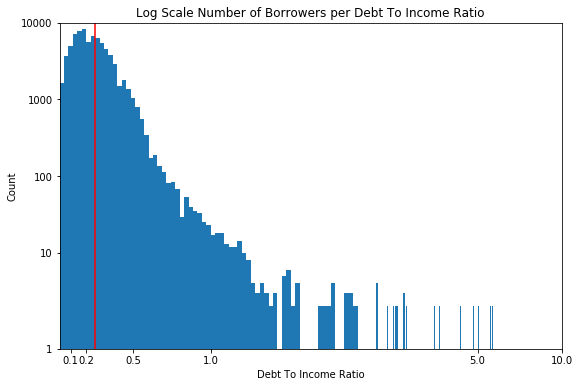

In [17]:
#Viewing the distribution of debt to income ratio.
from matplotlib.ticker import ScalarFormatter

# histogram on log scale
x = apr_data["DebtToIncomeRatio"]
fig, ax = plt.subplots(figsize = (9,6))
hist, bins, _ = plt.hist(x, bins=350)


logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(x, bins=logbins)
plt.axvline(x= apr_data.DebtToIncomeRatio.mean(), color = 'red')
plt.title('Log Scale Number of Borrowers per Debt To Income Ratio')
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Count')
plt.xscale('log')
ax.axis([0, 10, 1, 10000])
ax.set_yscale('symlog')
ax.set_xscale('symlog')
ax.set_xticks([0.1, 0.2, 0.5, 1, 5, 10])

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

plt.show()

The distribution of the debt to income ratio is right skewed, with the majority of ratios between 0 and 1. Dividing this data into two graphs may help with further APR correlation analysis.

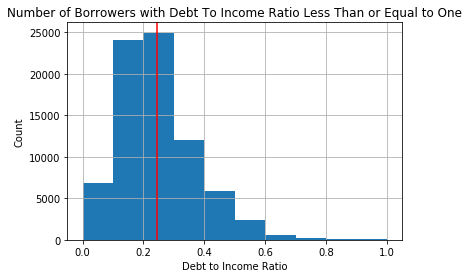

In [18]:
#A plot of borrowers with a debt to income ratio of less than or equal to one
less_one = apr_data.query('DebtToIncomeRatio <= 1')
less_one['DebtToIncomeRatio'].hist()
plt.axvline(x=less_one.DebtToIncomeRatio.mean(), color = 'red')
plt.title('Number of Borrowers with Debt To Income Ratio Less Than or Equal to One')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count');

The distribution of debt to income ratios that are less than or equal to one is right skewed. 

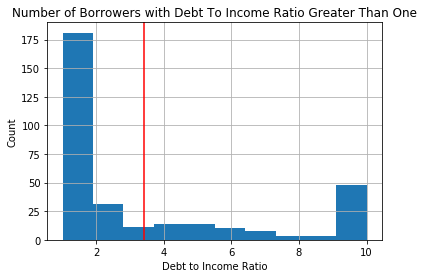

In [19]:
#A plot of borrowers with a debt to income ratio of less than or equal to one
more_one = apr_data.query('DebtToIncomeRatio > 1')
more_one['DebtToIncomeRatio'].hist()
plt.axvline(x=more_one.DebtToIncomeRatio.mean(), color = 'red') 
plt.title('Number of Borrowers with Debt To Income Ratio Greater Than One')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count');

The distribution of debt to income ratios greater than one is also right skewed, with outliers lying between 9 and 10. I would like to further investigate the debt to income ratios that are less than one and how they correlate to Borrower APR.

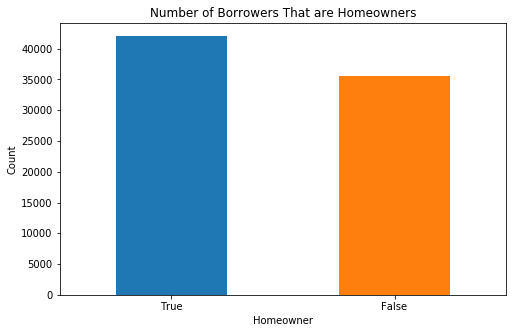

In [20]:
#Viewing the distribution of homeowners
apr_data['IsBorrowerHomeowner'].value_counts().plot(kind='bar', figsize=(8,5))
plt.xticks(rotation=0)
plt.title('Number of Borrowers That are Homeowners')
plt.xlabel('Homeowner')
plt.ylabel('Count');

The majority of borrowers in this dataset are homeowners. I would like to continue investigating how homeownership correlates to APR.

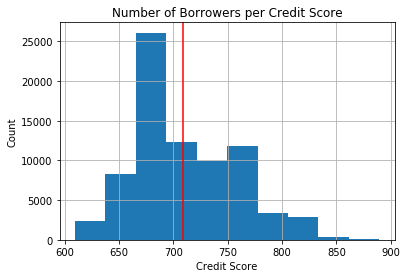

In [21]:
#Viewing the distribution of mean credit scores
apr_data['MeanCreditScore'].hist()
plt.axvline(x=apr_data.MeanCreditScore.mean(), color = 'red'); 
plt.title('Number of Borrowers per Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count');

The distribution of credit scores is right skewed, with the majority of scores between approximately 670 and 690. I would like to continue to investigate the correlation between credit score and APR.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Borrower APR plot didn't seem to have any unusual points, thus I did not need to perform any transformations to the data or chart.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was no data for borrowers who have zero dollar income range. This makes sense due to the fact these borrowers would have low probability of loan application acceptance, and if accepted, may have incomplete data.

>Because the debt to income ratio had such a broad spectrum (0-10) and the majority of data was between 0-1, I had to use a logorythmic scale to plot the results. I also plotted the data in two separate graphs, one with debt to income ratios <= 1 and the other graph of ratios >1. This gives me a complete overview of the debt to income ratio data.

>Due to the fact that the majority of credit score data lies between 400 and 900, I removed the outlier data that existed at the 0 credit score to limit the possibility of skewed results.

## Bivariate Exploration

> In this section, I want to explore the correlation between the variable on interest (Borrower APR) and the corresponding predictor variables in separate bivariate plots.

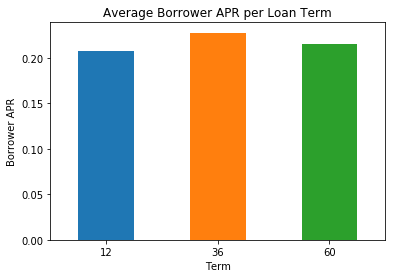

In [22]:
#Investigating APR in correlation to term of loan
apr_data.groupby('Term')['BorrowerAPR'].mean().plot(kind = 'bar')
plt.xticks(rotation=0)
plt.title('Average Borrower APR per Loan Term')
plt.ylabel('Borrower APR');

The 36 month term loan seems to have slightly higher borrower APR than the 12 and 60 month loans. Maybe loan data with longer terms would lead to more significant differences.

In [23]:
#Analyzing data between prosper rating and borrower APR
apr_data.groupby('ProsperRating (Alpha)')['BorrowerAPR'].mean()

ProsperRating (Alpha)
A     0.138904
AA    0.089999
B     0.184074
C     0.225862
D     0.280037
E     0.329705
HR    0.356216
Name: BorrowerAPR, dtype: float64

## Average Borrower APR per Prosper Rating

>The borrowers with the higher prosper rating receive the lower APR. I would like analyze more with Prosper Rating and Debt to Income Ratio and how they both correlate to Borrower APR

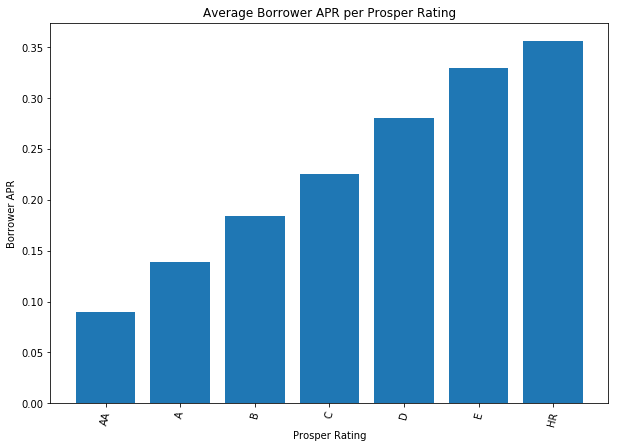

In [24]:
plt.subplots(figsize=(10,7))
locations = [1, 2, 3, 4, 5, 6, 7]
alpha_means = [0.089999, 0.138904, 0.184074, 0.225862, 0.280037, 0.329705, 0.356216]
prosper_alpha = ["AA", "A", "B", "C", "D", "E", "HR"]
plt.xticks(rotation=75)
plt.title('Average Borrower APR per Prosper Rating')
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.bar(locations, alpha_means, tick_label=prosper_alpha, );

In [25]:
#Comparing the Borrower APR with Income Range
apr_data.groupby('IncomeRange', sort=False)['BorrowerAPR'].mean()

IncomeRange
$50,000-74,999    0.221298
$25,000-49,999    0.244375
$100,000+         0.195198
$75,000-99,999    0.210660
$1-24,999         0.271140
Not employed      0.288000
Name: BorrowerAPR, dtype: float64

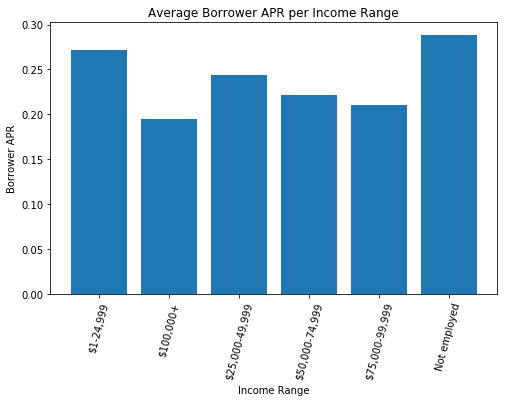

In [26]:
#Plotting Borrower APR vs Income Range
plt.subplots(figsize=(8,5))
apr_means = np.array([0.271140, 0.244375, 0.221298, 0.210660, 0.195198, 0.288000])
income_range = np.array(["$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+", "Not employed"])
plt.xticks(rotation=75)
plt.title('Average Borrower APR per Income Range')
plt.xlabel('Income Range')
plt.ylabel('Borrower APR')
plt.bar(income_range, apr_means);

The lower the income range, the higher the Borrower APR. I would like to continue analyzing borrower income range with mean credit score and how they correlate to APR.

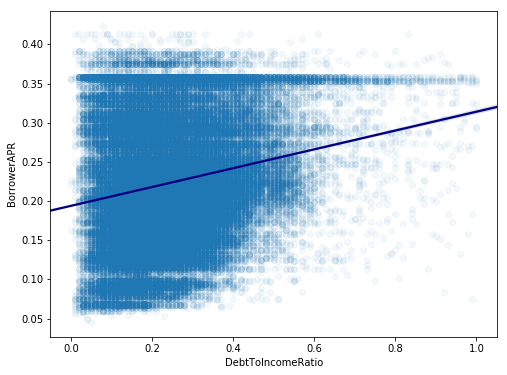

In [27]:
#Scatter plot of borrower APR vs borrowers with debt to income ratio of less than one
plt.figure(figsize = [8, 6])
apr_1_less = apr_data.query('DebtToIncomeRatio <= 1')
sns.regplot(x="DebtToIncomeRatio", y="BorrowerAPR", data=apr_1_less, scatter_kws={'alpha':0.05}, line_kws={'color': 'navy'});

Due to the vast amount of data in this chart, I used transparency to make the scatter more readable. The distribution of Debt To Income Ratio vs Borrower APR has a positive correlation for borrowers with a Debt to Income Ratio of <=1. I'm wondering if home ownership and debt to income ratio have any correlation to borrower APR.

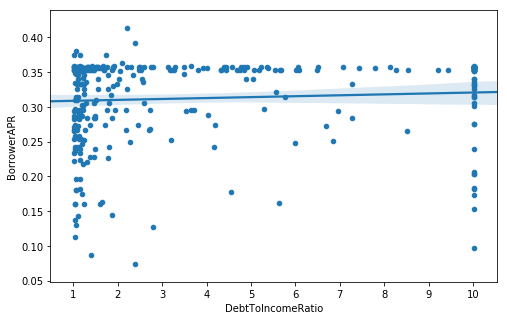

In [28]:
#Scatter plot of BorrowerAPR vs borrowers with debt to income ratio of more than one
apr_1_more = apr_data.query('DebtToIncomeRatio > 1')
apr_1_more.plot.scatter(x='DebtToIncomeRatio', y='BorrowerAPR', figsize = (8,5))
plt.xticks(np.arange(1, 11, step=1.0))
plt.yticks(np.arange(0, .5, step=0.05))
sns.regplot(x="DebtToIncomeRatio", y="BorrowerAPR", data=apr_1_more, scatter_kws={'alpha':0.03});

In [29]:
apr_1_more['intercept'] = 1

lm = sm.OLS(apr_1_more['DebtToIncomeRatio'], apr_1_more[['intercept', 'BorrowerAPR']])
results = lm.fit()
results.summary()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      DebtToIncomeRatio   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.488
Date:                Fri, 21 Aug 2020   Prob (F-statistic):              0.223
Time:                        21:01:52   Log-Likelihood:                -832.65
No. Observations:                 323   AIC:                             1669.
Df Residuals:                     321   BIC:                             1677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       2.3455      0.907      2.586      0.010       0.561       4.130
BorrowerAPR     3.4757      2.850      1.220      0.223      -2.131       9.082
==============================================================================
Omnibus:                       54.210   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.945
Skew:                           1.218   Prob(JB):                     4.37e-18
Kurtosis:                       2.951   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The distribution of Debt To Income Ratio vs Borrower APR has a slightly positive correlation for borrowers with a Debt to Income Ratio of greater than one.

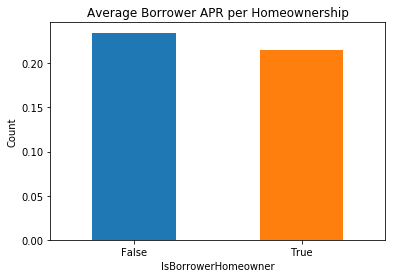

In [30]:
#Plotting Homeowners vs Borrower APR
apr_data.groupby('IsBorrowerHomeowner')['BorrowerAPR'].mean().plot(kind = 'bar')
plt.xticks(rotation=0)
plt.title('Average Borrower APR per Homeownership')
plt.ylabel('Count');

Homeowners receive slightly less Borrower APR than non-homeowners. I would to further analyze Homeownership with Income Range and its correlation to APR.

## Borrower APR vs Mean Credit Score

>The original plot had outliers at the zero mean credit score. These were filtered out to just analyze the credit scores between 400 and 900. There is a negative correlation between Mean Credit Score and Borrower APR. I would like to analyze Mean Credit Score with Homeownership and its correlation to APR.

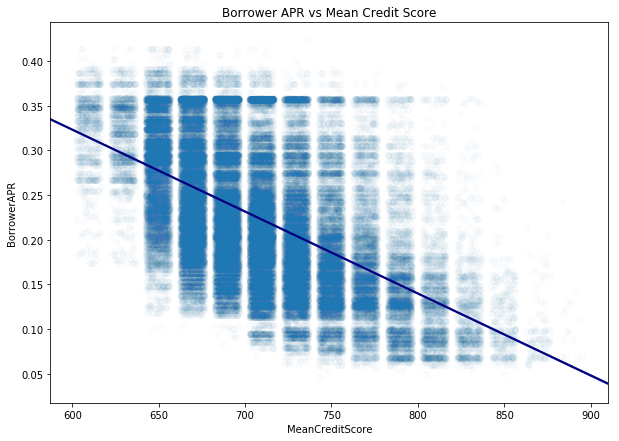

In [31]:
#Compare BorrowerAPR with mean credit score
plt.subplots(figsize=(10,7))
credit_score = apr_data.query('MeanCreditScore >= 400')
sns.regplot(data = credit_score, x = 'MeanCreditScore', y = 'BorrowerAPR', fit_reg = True,
           x_jitter = 7, y_jitter = 0, scatter_kws={'alpha':0.02}, line_kws={'color': 'navy'})
plt.title('Borrower APR vs Mean Credit Score');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>There were significant correlations between Prosper Rating, Income Range, and Debt to Income Ratio(<=1) with Borrower APR and I will continue to further investigate these. 
- The lower the Prosper Rating, the higher the APR, which makes sense because these borrowers are viewed as more of a risk. 
- As income range increases, APR decreases, as the individuals with higher income have a higher probability of paying back the loan. 
- The Debt to Income ratio(<=1) showed a positive correlation, since those borrowers with a higher ratio would be viewed as more of a risk, therefor, have a higher APR.

>Homeowners have a slightly less APR than non-homeowners, possibly because homeowners are viewed as a less risky investment.

>There is a negative correlation between APR and mean credit score, ie, the lower the credit score, the higher the APR, which makes sense because higher credit score means there is less risk involved. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>There was not a significant difference between term of loan with borrower APR, perhaps longer term loans would lead to more significant differences. 

>There was a high degree of standard error with the Debt to Income Ratio (>1) vs. APR data, using this data alone would not create accurate results.

## Multivariate Exploration

> I would like to analyze the correlation between categorical variables (Prosper Rating, Income Range, Homeownership) with the Debt to Income Ratio and Mean Credit Score, and how these effect the Borrower APR.

## Affect of Prosper Rating on Debt to Income Ratio and APR

>Borrower APR seems to increase as Prosper Rating declines. 

>Interestingly, the correlation between debt to income ratio and APR turns from slightly positive at Rating 'AA' only to produce negative and zero correlation as the ratings decline. The negative/zero correlations seem to start at the 'B' Prosper Ratings. This could be due to lack of loans being given to borrowers with a debt to income ratio exceeding 0.5. 

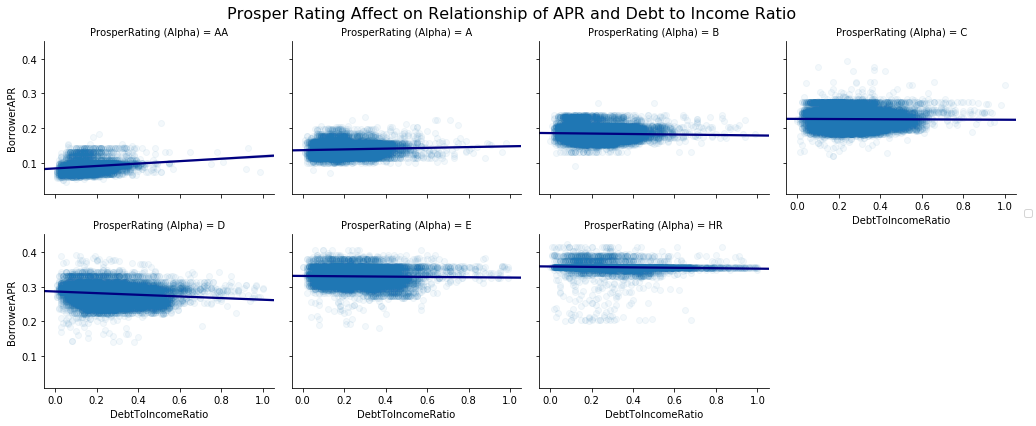

In [45]:
# Prosper Rating effect on relationship of APR and Debt to Income Ratio
g=sns.FacetGrid(data=apr_1_less, aspect=1.2, size=3, col='ProsperRating (Alpha)', col_order=["AA", "A", "B", "C", "D", "E", "HR"], col_wrap=4)
g.map(sns.regplot, 'DebtToIncomeRatio', 'BorrowerAPR', scatter_kws={'alpha':0.05}, line_kws={'color': 'navy'})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Prosper Rating Affect on Relationship of APR and Debt to Income Ratio', fontsize=16)
g.add_legend();

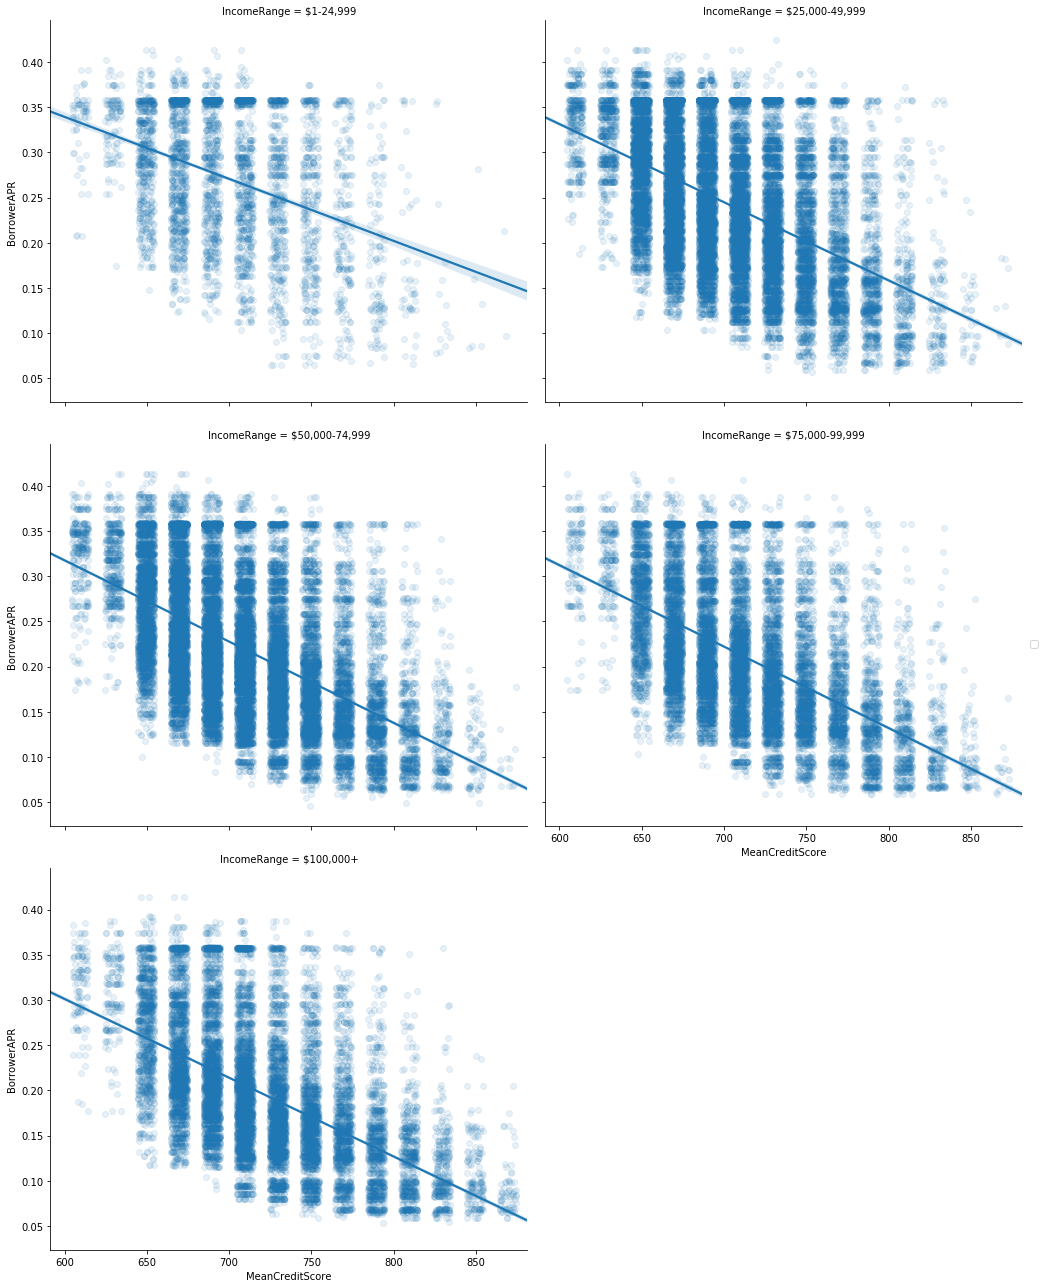

In [33]:
# Income Range effect on relationship of APR and Mean Credit Score
g=sns.FacetGrid(data=apr_data, aspect=1.2, size=6, col='IncomeRange', col_order=["$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"], col_wrap=2)
g.map(sns.regplot, 'MeanCreditScore', 'BorrowerAPR', x_jitter=5, scatter_kws={'alpha':0.1})
g.add_legend();

An Income Range $1-24,000 seems to have a slightly higher APR than the rest of the ranges. The other income ranges don't seem to have much effect on the relationship between Mean Credit Score and APR.

## Affect of Income Range and Homeownership on Borrower APR

>This graph shows that higher income ranges receive the lower APR, which makes sense because higher income borrowers are seen as having less risk.

>The income range of 1-24,999 has a higher APR for homeowners than non homeowners. This is most likely due to homeownership being more risky for borrowers with a lower income. Starting at the 25,000 income range, APR is less for homeowners than non-homeowners.

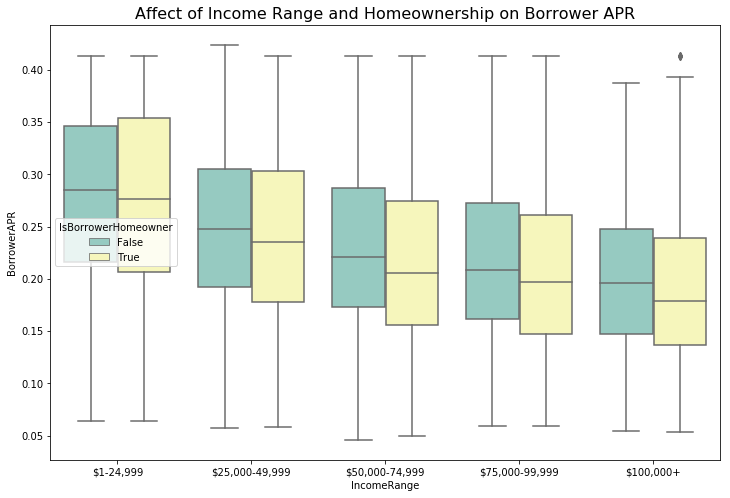

In [34]:
# Analyzing the effect of Income Range and Homeownership to Borrower APR.
plt.figure(figsize = [12, 8])
ax = sns.boxplot(x="IncomeRange", y="BorrowerAPR", hue="IsBorrowerHomeowner", data=apr_data, order=["$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"], palette="Set3")
plt.title('Affect of Income Range and Homeownership on Borrower APR', fontsize=16);

## Affect of Prosper Rating with Homownership on Mean Credit Score and APR

>According to these graphs, as mean credit score declines, the borrower APR increases, which makes sense because low credit scores are seen as a riskier investment.

>The higher prosper ratings ("AA"-"B") have a negative or zero correlation between mean credit score and Borrower APR. The lower prosper ratings ("C"-"HR") tend to have a positive or zero correlation between mean credit score and Borrower APR. There must be other factors that effect these lower ratings to cause a higher APR with a higher mean credit score.

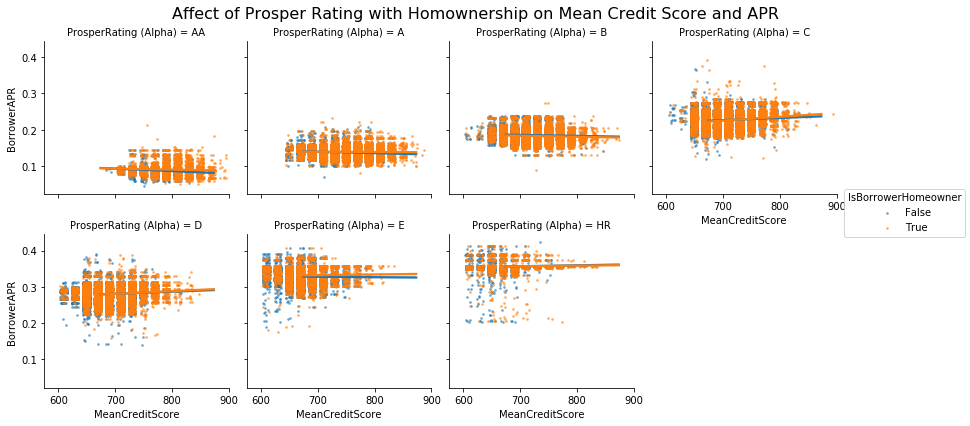

In [53]:
#Prosper Rating with Homeownership and the correlation to mean credit score and Borrower APR
g = sns.FacetGrid(data=apr_data, col='ProsperRating (Alpha)', col_order=["AA", "A", "B", "C", "D", "E", "HR"], hue='IsBorrowerHomeowner', col_wrap=4, size=3);
g.map(sns.regplot, "MeanCreditScore", "BorrowerAPR", scatter_kws={'s': 3, 'alpha':0.5}, fit_reg=True, x_jitter=6);
plt.subplots_adjust(top=0.9)
g.set(xlim=(575, 900))
g.fig.suptitle('Affect of Prosper Rating with Homownership on Mean Credit Score and APR', fontsize=16)
g.add_legend();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The income range of 1-24,000 has a high probability of increased APR, even with homeownership.
> Starting with the income of 25,000 the APR decreases as the income range increases, with homeowners having a slightly lower APR than non homeowners.

### Were there any interesting or surprising interactions between features?

> The regression of Prosper Rating with Debt to Income Ratio on APR had a surprising trend. The regression turned from a positive trend to a zero or negative trend as the Prosper Rating declined.

> The regression between Mean Credit Score with Prosper Rating on Borrower APR revealed that higher prosper ratings produced a negative or zero correlation . This makes sense because the higher the credit score, the lower the APR would be. However, starting at the "C" prosper rating, the trend starts to shift to a more zero or positive correlation ie, the higher the credit score, the higher the APR. This leads me to believe that these lower Prosper ratings have other negative variables that would cause these trends. 

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 874945 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: